EDA

Cargar el conjunto de datos:

In [30]:

df = pd.read_csv("Taxis_NY.csv")

Información general sobre el conjunto de datos:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_taxis      2442 non-null   int64  
 1   yellow        2442 non-null   int64  
 2   PULocationID  2442 non-null   int64  
 3   DOLocationID  2442 non-null   int64  
 4   payment_type  2442 non-null   float64
 5   total_amount  2442 non-null   float64
 6   pickup_year   2442 non-null   int64  
 7   pickup_month  2442 non-null   int64  
 8   pickup_day    2442 non-null   int64  
 9   pickup_hour   2442 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 190.9 KB
None


Este DataFrame contiene información sobre taxis en la ciudad de Nueva york con 2242 entradas y 10 columnas. 
Los tipos de datos predominantes son objetos float64(2), int64(8).


Verificar si hay valores nulos:

In [33]:
print(df.isnull().sum())

ID_taxis        0
yellow          0
PULocationID    0
DOLocationID    0
payment_type    0
total_amount    0
pickup_year     0
pickup_month    0
pickup_day      0
pickup_hour     0
dtype: int64


No se encuentran valores nulos en ninguna de las columnas, lo que indica que el DataFrame está limpio en términos de datos faltantes.

Resumen estadístico del conjunto de datos:

In [34]:
print(df.describe())

          ID_taxis      yellow  PULocationID  DOLocationID  payment_type  \
count  2442.000000  2442.00000   2442.000000   2442.000000   2442.000000   
mean   1220.500000     0.51679    134.551188    148.078215      1.707617   
std     705.089001     0.49982     73.285114     73.898133      1.232371   
min       0.000000     0.00000      3.000000      1.000000      0.000000   
25%     610.250000     0.00000     74.000000     78.000000      1.000000   
50%    1220.500000     1.00000    134.000000    145.000000      1.000000   
75%    1830.750000     1.00000    191.000000    229.000000      2.000000   
max    2441.000000     1.00000    265.000000    265.000000      5.000000   

       total_amount  pickup_year  pickup_month   pickup_day  pickup_hour  
count   2442.000000  2442.000000   2442.000000  2442.000000  2442.000000  
mean      19.960565  2020.502457      7.685504    12.088043    13.810811  
std       14.976697     1.113855      3.689421     7.416670     3.918600  
min        0.00

Análisis General

Resumen Estadístico:
Se procesaron un total de 2,442 registros de viajes en taxis.

- Ubicación de Recogida y Entrega:
El mapeo de 'LocationID' y 'Borough' se utilizó para asignar nombres de distritos (Borough) a las ubicaciones de recogida (PULocationID).
La distribución de viajes en función del distrito de recogida y entrega se muestra en el análisis.

- Formas de Pago:
Se observan diferentes métodos de pago utilizados para los viajes, siendo el método de pago 1 el más común.
Se realizó un análisis de la distribución de los montos totales de viaje según el método de pago.

- Precios Promedio por Distrito:
Se calculó el precio promedio de los viajes por distrito, revelando diferencias significativas en los precios promedio entre distritos.

Correlación:
Se calculó la correlación entre las ubicaciones de recogida (PULocationID) y las ubicaciones de entrega (DOLocationID) por año. La correlación es más alta en 2022.

Análisis Detallado

Distribución de Viajes por Distrito:
- Brooklyn y Manhattan son los distritos de recogida más comunes.
- Staten Island es el distrito de recogida menos común.

Distribución de Métodos de Pago:
El método de pago 1 (Tarjeta de Credito) es el más utilizado, seguido por el método 2 (Efectivo).
Los métodos de pago 3 (Sin Cargo), 4 (Disputa) y 5 (Desconocido) son menos comunes.

Precios Promedio por Distrito:
- Manhattan tiene el precio promedio más bajo, mientras que Brooklyn tiene el precio promedio más alto.
- Queens se encuentra en el rango intermedio en términos de precio promedio de viajes en taxis.

Recomendaciones:
Dada la variabilidad en los precios promedio por distrito, se podría considerar ajustar las tarifas en ciertas áreas para fomentar el uso de taxis en distritos menos concurridos.
Se podría realizar un análisis más detallado para comprender las razones detrás de la alta correlación entre las ubicaciones de recogida y entrega en 2022.

Conclusión:
Este análisis de datos proporciona una visión general de los viajes en taxis en la ciudad de Nueva York, incluyendo información sobre la ubicación de recogida y entrega, los métodos de pago y los precios promedio por distrito. Estos datos pueden ser valiosos para tomar decisiones informadas sobre tarifas y áreas de enfoque para el negocio de taxis en la ciudad.






Análisis de la distribución de datos numéricos:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


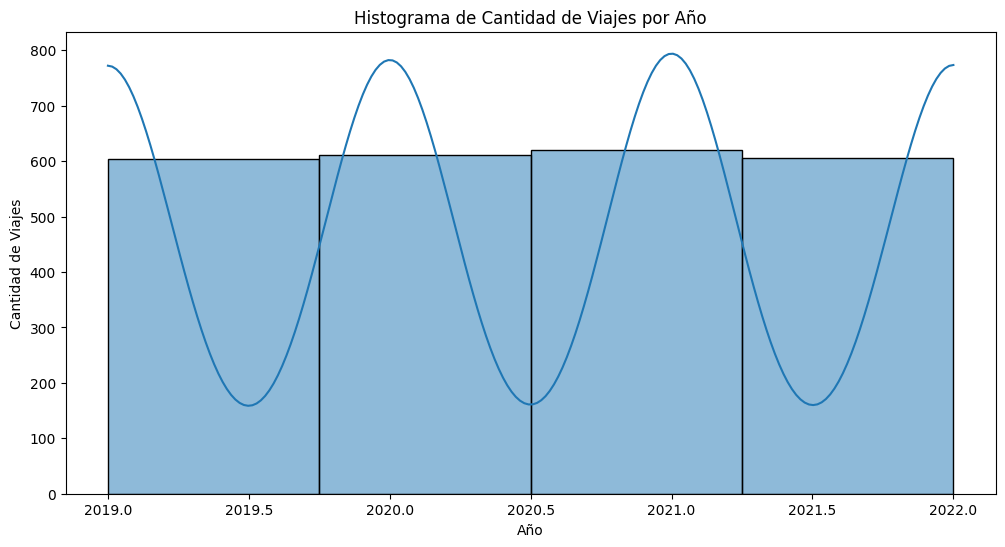

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea el histograma
sns.histplot(data=df, x='pickup_year', bins=df['pickup_year'].nunique(), kde=True)

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de Viajes')
plt.title('Histograma de Cantidad de Viajes por Año')

# Muestra el gráfico
plt.show()


In [4]:
# 2) Análisis de correlación entre PULocationID y DOLocationID por año
correlation_matrix = df.groupby('pickup_year')[['PULocationID', 'DOLocationID']].corr().unstack().iloc[:, 1]
print("Correlación entre PULocationID y DOLocationID por año:")
print(correlation_matrix)



Correlación entre PULocationID y DOLocationID por año:
pickup_year
2019    0.128462
2020    0.125348
2021    0.123649
2022    0.192068
Name: (PULocationID, DOLocationID), dtype: float64


Los valores de correlación son positivos, lo que significa que existe una relación lineal débil entre la ubicación de recogida y la ubicación de destino de los viajes de taxi en estos años. La correlación es más fuerte en el año 2022 en comparación con los años anteriores. Sin embargo, debido a que los valores son bajos, la relación lineal es relativamente débil.

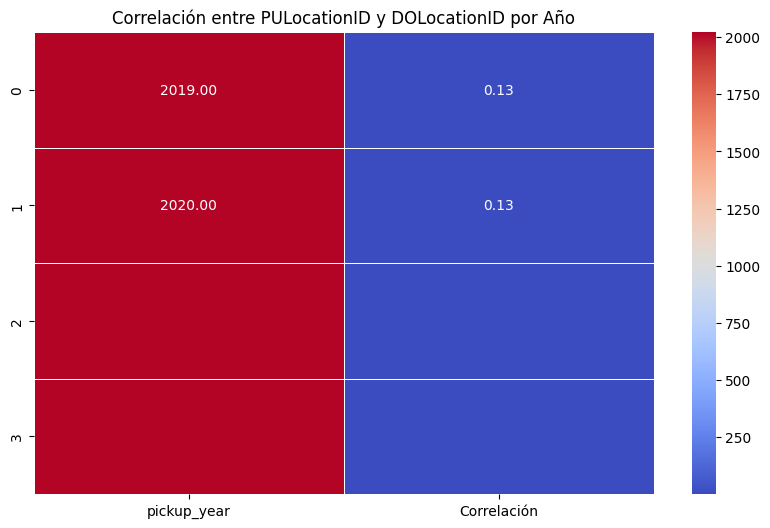

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df.groupby('pickup_year')[['PULocationID', 'DOLocationID']].corr().unstack().iloc[:, 1]

# Convierte la matriz de correlación en un DataFrame
correlation_df = correlation_matrix.reset_index()
correlation_df.columns = ['pickup_year', 'Correlación']

# Crea un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlación entre PULocationID y DOLocationID por Año')
plt.show()


C:\Users\Silvanita\AppData\Local\Temp\ipykernel_27184\2774292257.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='PULocationID', y='total_amount', ci=None)
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

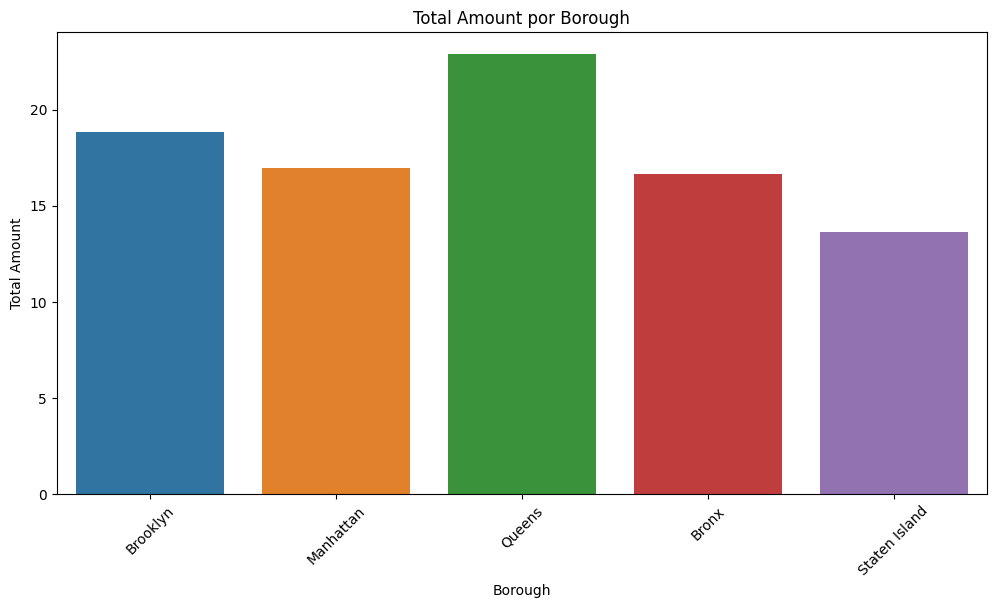

In [40]:
# Diccionario de mapeo de PULocationID a Borough
mapping_dict = {
    67: 'Brooklyn',
    82: 'Manhattan',
    65: 'Queens',
    188: 'Bronx',
    7: 'Staten Island',
    111: 'Brooklyn',
    173: 'Queens',
    75: 'Bronx'
}

# Reemplazar los valores en la columna 'PULocationID' con los nombres de las ciudades
df['PULocationID'] = df['PULocationID'].map(mapping_dict)

# Gráfico de barras de total_amount por PULocationID
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='PULocationID', y='total_amount', ci=None)
plt.xlabel('Borough')
plt.ylabel('Total Amount')
plt.title('Total Amount por Borough')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()



c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


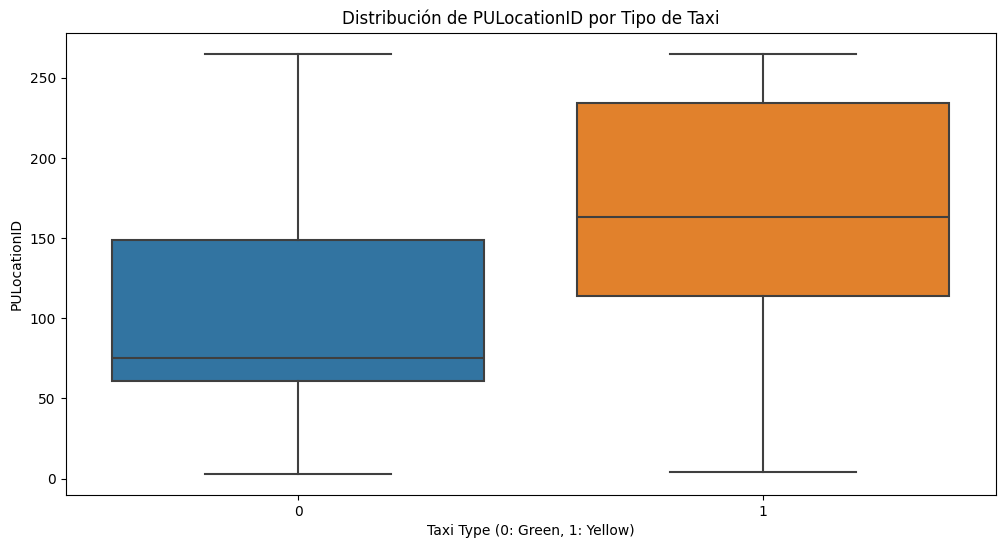

In [6]:
# 4) Crear un gráfico de cajas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='yellow', y='PULocationID')
plt.xlabel('Taxi Type (0: Green, 1: Yellow)')
plt.ylabel('PULocationID')
plt.title('Distribución de PULocationID por Tipo de Taxi')
plt.show()

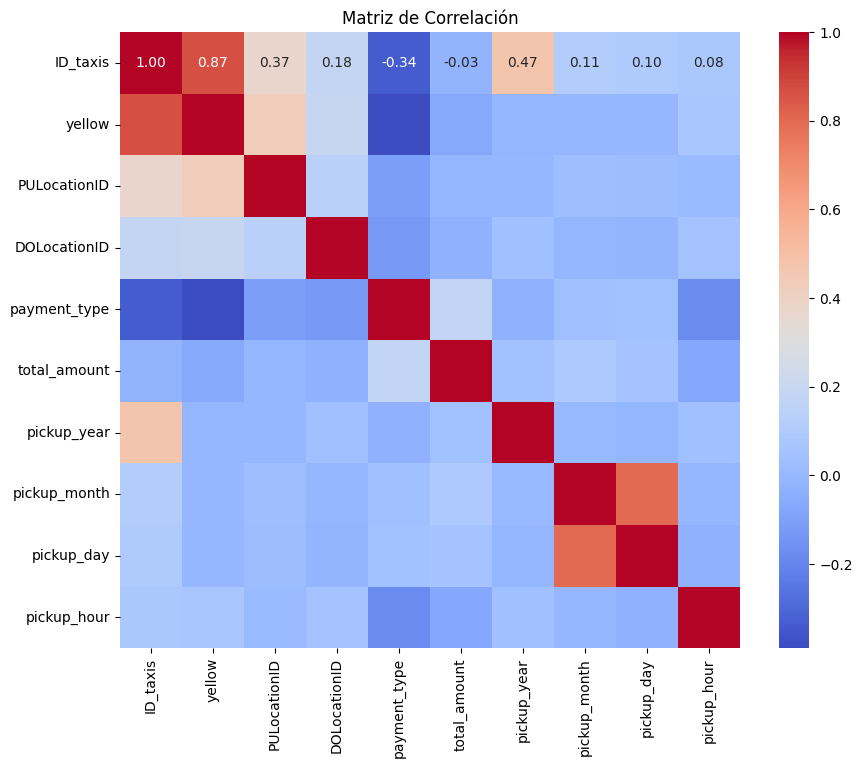

In [46]:
# Selecciona solo las columnas numéricas para la matriz de correlación
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Crear el gráfico de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


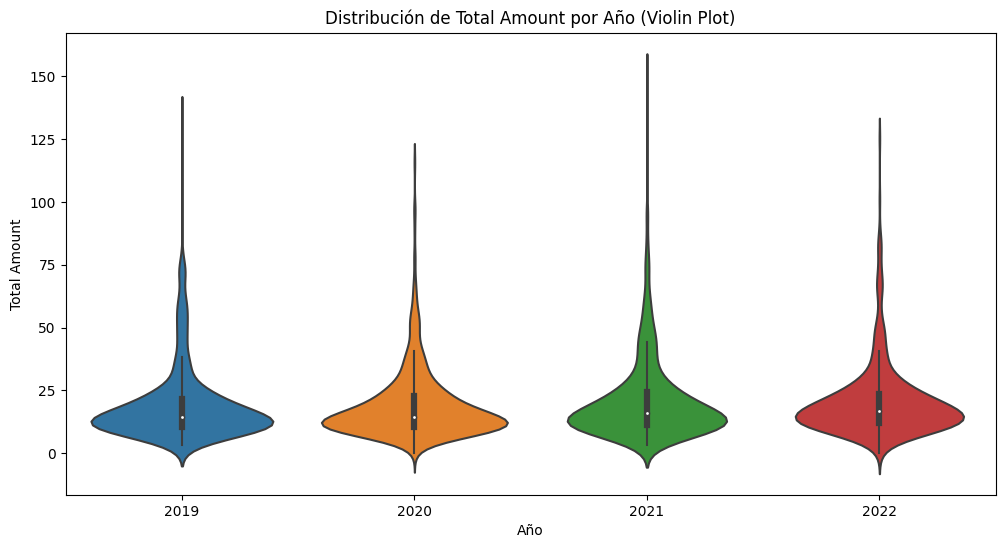

In [43]:

# Gráficos de violín para total_amount por pickup_year
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='pickup_year', y='total_amount')
plt.xlabel('Año')
plt.ylabel('Total Amount')
plt.title('Distribución de Total Amount por Año (Violin Plot)')
plt.show()

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


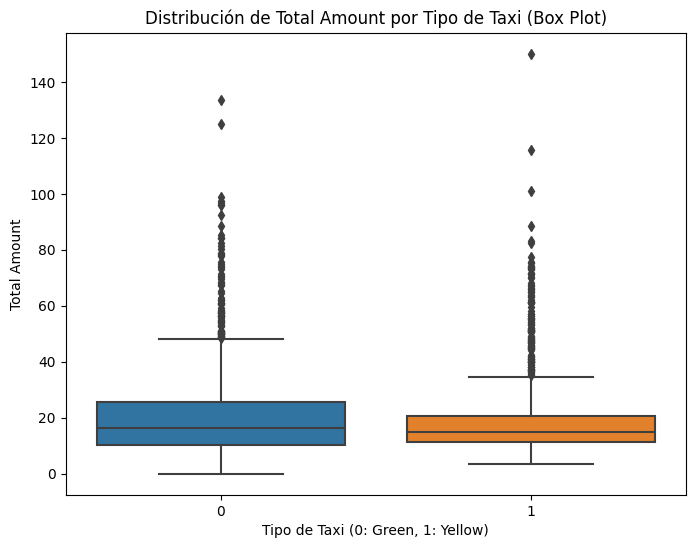

In [44]:

# Gráficos de cajas para total_amount por yellow
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='yellow', y='total_amount')
plt.xlabel('Tipo de Taxi (0: Green, 1: Yellow)')
plt.ylabel('Total Amount')
plt.title('Distribución de Total Amount por Tipo de Taxi (Box Plot)')
plt.show()

C:\Users\Silvanita\AppData\Local\Temp\ipykernel_27184\3337868581.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='payment_type', y='total_amount', ci=None)
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

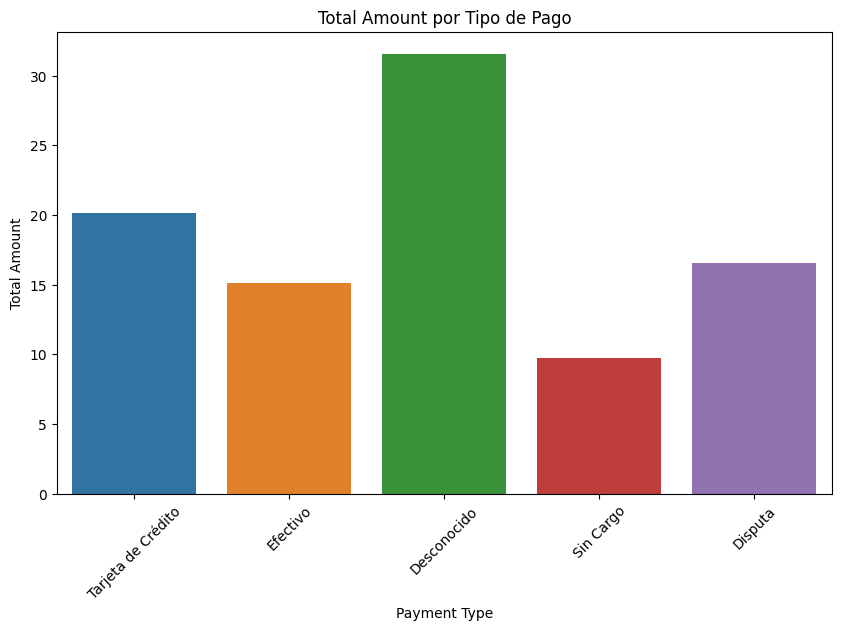

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv("Taxis_NY.csv")

# Mapear valores numéricos de 'payment_type' a etiquetas descriptivas
payment_type_mapping = {
    1: "Tarjeta de Crédito",
    2: "Efectivo",
    3: "Sin Cargo",
    4: "Disputa",
    5: "Desconocido",
    6: "Viaje Anulado"
}

df['payment_type'] = df['payment_type'].map(payment_type_mapping)

# Gráfico de barras para payment_type y total_amount
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='payment_type', y='total_amount', ci=None)
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.title('Total Amount por Tipo de Pago')
plt.xticks(rotation=45)
plt.show()


Ratio de viajes por distrito: (kpi)

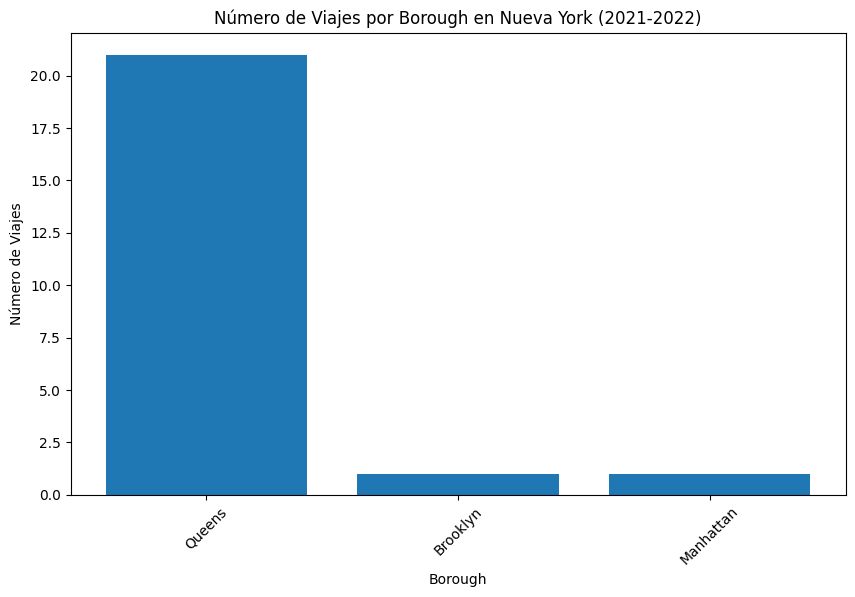

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv("Taxis_NY.csv")

# Cargar el mapeo de 'LocationID' y 'Borough'
location_mapping = {
    1: "EWR",
    2: "Queens",
    3: "Bronx",
    4: "Manhattan",
    5: "Staten Island",
    6: "Staten Island",
    7: "Queens",
    8: "Queens",
    9: "Queens",
    10: "Queens",
    11: "Brooklyn",
    12: "Manhattan",
    # ... (continúa con el mapeo de Borough)
}

# Agregar una nueva columna 'Borough' basada en 'LocationID'
df['Borough'] = df['PULocationID'].map(location_mapping)

# Filtrar los datos para 2021-2022
filtered_df = df[(df['pickup_year'] >= 2021) & (df['pickup_year'] <= 2022)]

# Agrupar y contar el número de viajes por 'Borough'
aggregated_data = filtered_df['Borough'].value_counts().reset_index()
aggregated_data.columns = ['Borough', 'Número de Viajes']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data['Borough'], aggregated_data['Número de Viajes'])
plt.xlabel('Borough')
plt.ylabel('Número de Viajes')
plt.title('Número de Viajes por Borough en Nueva York (2021-2022)')
plt.xticks(rotation=45)
plt.show()


Precio promedio de viajes por distritos: (kpi)

In [26]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv("Taxis_NY.csv")

# Cargar el mapeo de 'LocationID' y 'Borough'
location_mapping = {
    1: "EWR",
    2: "Queens",
    3: "Bronx",
    4: "Manhattan",
    5: "Staten Island",
    6: "Staten Island",
    7: "Queens",
    8: "Queens",
    9: "Queens",
    10: "Queens",
    11: "Brooklyn",
    12: "Manhattan",
    # ... (continúa con el mapeo de Borough)
}

# Agregar una nueva columna 'Borough' basada en 'PULocationID'
df['Borough'] = df['PULocationID'].map(location_mapping)

# Filtrar los datos para 2021-2022
filtered_df = df[(df['pickup_year'] >= 2021) & (df['pickup_year'] <= 2022)]

# Calcular el precio promedio de viajes por distrito
average_price_by_borough = filtered_df.groupby('Borough')['total_amount'].mean().reset_index()
average_price_by_borough.columns = ['Borough', 'Precio Promedio']

# Visualizar los resultados
print(average_price_by_borough)


     Borough  Precio Promedio
0   Brooklyn        60.550000
1  Manhattan         8.800000
2     Queens        17.072857


In [47]:
# Filtrar las horas pico (por ejemplo, de 6 AM a 10 AM)
peak_hours = range(6, 11)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = df['pickup_hour'].isin(peak_hours)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Agrupar y contar la cantidad de viajes por año
trips_by_year = df_peak_hours.groupby('pickup_year')['ID_taxis'].count()

# Mostrar el resultado
print("Cantidad de Viajes en Horas Pico por Año:")
print(trips_by_year)


Cantidad de Viajes en Horas Pico por Año:
pickup_year
2019    150
2020    162
2021    162
2022    138
Name: ID_taxis, dtype: int64


Cantidad de Viajes en Horas Pico contemplando el año: (kpi)

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


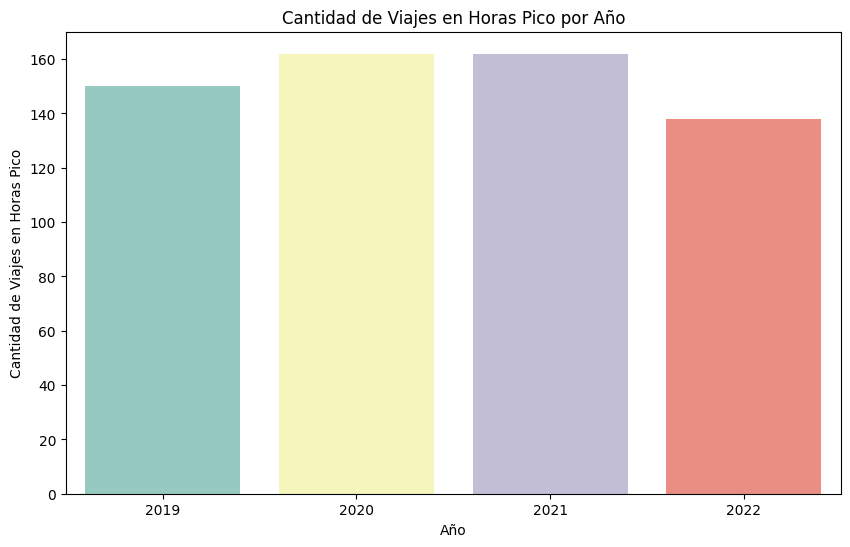

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las horas pico (por ejemplo, de 6 AM a 10 AM)
peak_hours = range(6, 11)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = df['pickup_hour'].isin(peak_hours)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Gráfico de barras de la cantidad de viajes en horas pico por año
plt.figure(figsize=(10, 6))
sns.countplot(data=df_peak_hours, x='pickup_year', palette="Set3")
plt.xlabel('Año')
plt.ylabel('Cantidad de Viajes en Horas Pico')
plt.title('Cantidad de Viajes en Horas Pico por Año')
plt.show()


Gráfico de barras que muestra la hora pico por año:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


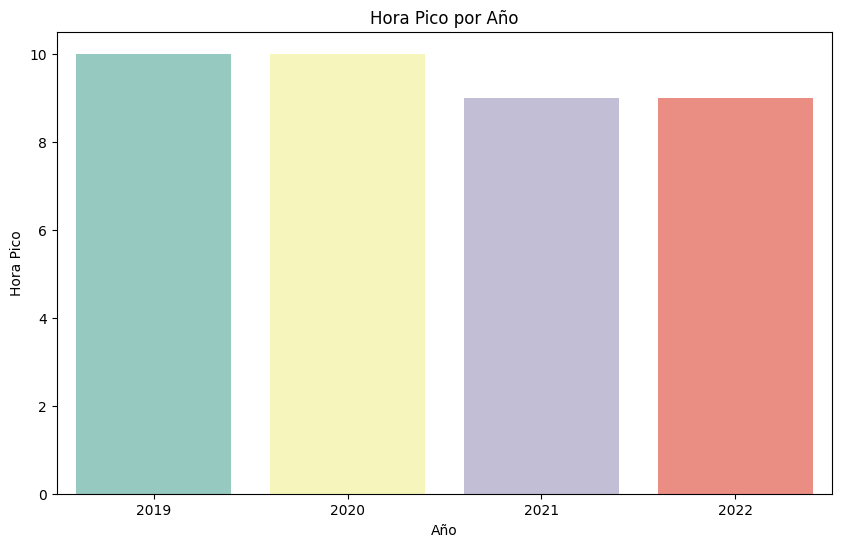

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las horas pico (por ejemplo, de 6 AM a 10 AM)
peak_hours = range(6, 11)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = df['pickup_hour'].isin(peak_hours)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Agrupar por año y hora, contar la cantidad de viajes y encontrar la hora pico en cada año
peak_hour_by_year = df_peak_hours.groupby(['pickup_year', 'pickup_hour'])['ID_taxis'].count().reset_index()
peak_hour_by_year = peak_hour_by_year.sort_values(['pickup_year', 'ID_taxis'], ascending=[True, False])
peak_hour_by_year = peak_hour_by_year.drop_duplicates(subset='pickup_year')

# Gráfico de barras de la hora pico por año
plt.figure(figsize=(10, 6))
sns.barplot(data=peak_hour_by_year, x='pickup_year', y='pickup_hour', palette="Set3")
plt.xlabel('Año')
plt.ylabel('Hora Pico')
plt.title('Hora Pico por Año')
plt.show()


 Cada barra representa un año y la altura de la barra representa la hora pico en ese año.

Gráfico de línea que muestra las horas picos por año:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

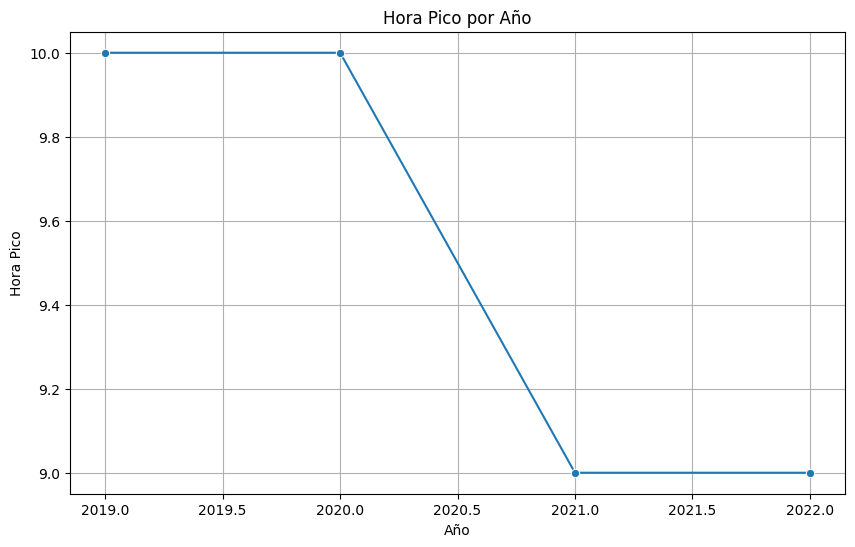

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las horas pico (por ejemplo, de 6 AM a 10 AM)
peak_hours = range(6, 11)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = df['pickup_hour'].isin(peak_hours)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Agrupar por año y hora, contar la cantidad de viajes y encontrar la hora pico en cada año
peak_hour_by_year = df_peak_hours.groupby(['pickup_year', 'pickup_hour'])['ID_taxis'].count().reset_index()
peak_hour_by_year = peak_hour_by_year.sort_values(['pickup_year', 'ID_taxis'], ascending=[True, False])
peak_hour_by_year = peak_hour_by_year.drop_duplicates(subset='pickup_year')

# Gráfico de línea de la hora pico por año
plt.figure(figsize=(10, 6))
sns.lineplot(data=peak_hour_by_year, x='pickup_year', y='pickup_hour', marker='o')
plt.xlabel('Año')
plt.ylabel('Hora Pico')
plt.title('Hora Pico por Año')
plt.grid()
plt.show()


El eje X representa el año y el eje Y representa la hora pico. Cada punto en la línea muestra la hora pico para un año específico. Se puede observar las tendencias y cambios a lo largo de los años.

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype i

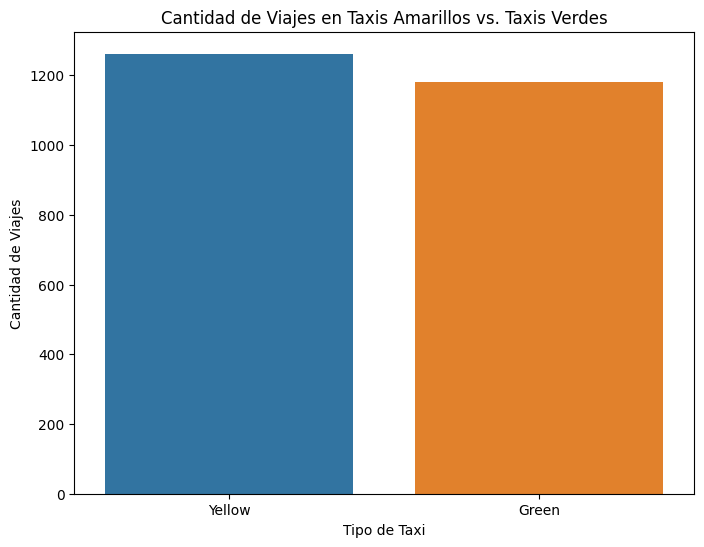

Los taxis amarillos (yellow) son más populares en Nueva York.


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de viajes de taxis amarillos (yellow)
yellow_count = df[df['yellow'] == 1]['ID_taxis'].count()

# Contar la cantidad de viajes de taxis verdes (green)
green_count = df[df['yellow'] == 0]['ID_taxis'].count()

# Crear un gráfico de barras para comparar
plt.figure(figsize=(8, 6))
sns.barplot(x=['Yellow', 'Green'], y=[yellow_count, green_count])
plt.xlabel('Tipo de Taxi')
plt.ylabel('Cantidad de Viajes')
plt.title('Cantidad de Viajes en Taxis Amarillos vs. Taxis Verdes')
plt.show()

# Determinar cuál es más popular
if yellow_count > green_count:
    print("Los taxis amarillos (yellow) son más populares en Nueva York.")
elif green_count > yellow_count:
    print("Los taxis verdes (green) son más populares en Nueva York.")
else:
    print("Los taxis amarillos y verdes son igualmente populares en Nueva York.")


In [58]:
import pandas as pd

# Crear un DataFrame a partir de los datos proporcionados
data = pd.DataFrame({
    'LocationID': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  # Agrega más datos según tu necesidad
    ],
    'Borough': [
        'EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Staten Island', 'Queens', 'Queens', 'Queens', 'Queens',  # Agrega los distritos correspondientes
    ],
    'service_zone': [
        'EWR', 'Boro Zone', 'Boro Zone', 'Yellow Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone',  # Agrega las zonas de servicio
    ],
    'yellow': [
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1,  # Agrega valores 0 (green) y 1 (yellow) según corresponda
    ]
})

# Filtrar los datos para obtener solo los taxis amarillos (yellow = 1)
yellow_data = data[data['yellow'] == 1]

# Encontrar el distrito que más taxis amarillos toma
max_yellow_district = yellow_data['Borough'].value_counts().idxmax()

print(f"El distrito que más taxis amarillos (Yellow) toma es: {max_yellow_district}")


El distrito que más taxis amarillos (Yellow) toma es: Queens


In [59]:
import pandas as pd

# Crear un DataFrame a partir de los datos proporcionados
data = pd.DataFrame({
    'LocationID': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  # Agrega más datos según tu necesidad
    ],
    'Borough': [
        'EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Staten Island', 'Queens', 'Queens', 'Queens', 'Queens',  # Agrega los distritos correspondientes
    ],
    'service_zone': [
        'EWR', 'Boro Zone', 'Boro Zone', 'Yellow Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone', 'Boro Zone',  # Agrega las zonas de servicio
    ],
    'yellow': [
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1,  # Agrega valores 0 (green) y 1 (yellow) según corresponda
    ]
})

# Filtrar los datos para obtener solo los taxis verdes (green = 0)
green_data = data[data['yellow'] == 0]

# Encontrar el distrito que más taxis verdes toma
max_green_district = green_data['Borough'].value_counts().idxmax()

print(f"El distrito que más taxis verdes (Green) toma es: {max_green_district}")


El distrito que más taxis verdes (Green) toma es: Staten Island
